In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
#Read in results cube
results_file = '/Users/Sophieslaptop/Desktop/NGC_5806/Binned cube files/Binned_SNR50/Run 8/Run8_Results_cube_SNR50_060223.fits'
results_hdu = fits.open(results_file)
results_cube = results_hdu[0].data

In [10]:
data_cube_hdu = fits.open('/Users/Sophieslaptop/Desktop/NGC_5806/Binned cube files/Binned_SNR50/Binned_cube_SNR50.fits')
data_cube = data_cube_hdu[0].data
err_cube = data_cube_hdu[1].data

In [11]:
lam1 = np.loadtxt('/Users/Sophieslaptop/Desktop/NGC_5806/Binned cube files/Binned_SNR50/Run 7/Run7_lam1_051223.txt')
lam1 = lam1.astype(int)
                             

In [12]:
#Read in best_fit cube
#bestfit_file = '/Users/Sophieslaptop/Desktop/NGC_5806/Binned cube files/Binned_SNR50/Run 5/Run5_Bestfit_cube_SNR50_051023.fits'
#bestfit_hdu = fits.open(bestfit_file)
#bestfit_cube = bestfit_hdu[0].data


In [13]:
#Define x and y axes for all the images
nz,ny,nx = results_cube.shape

xcen = nx/2  #Could later input more exact location of AGN
ycen = ny/2   #But for now, estimating center of image

vectorx = (np.arange(nx)-xcen)* 22 #Convert from pixes to pc      
vectory = (np.arange(ny)-ycen)* 22

X,Y = np.meshgrid(vectorx, vectory)
print(X.shape,Y.shape)


(446, 442) (446, 442)


In [14]:
def bad_pix(image_2D,results_err_ind,gas=True):
    ny,nx = image_2D.shape
    for i in range(nx):
        for j in range(ny):
            flux = image_2D[j,i]
            #Find error from results cube
            err = np.squeeze(results_cube[results_err_ind,j,i])
            #Correct with chi^2 value
            #(chi^2 is actually chi^2/DOF)
            if gas==True: 
                chi2 = results_cube[22,j,i]
                corr_err = err * np.sqrt(chi2)
            else: 
                chi2 = results_cube[21,j,i]
                corr_err = err * np.sqrt(chi2)
                
            if (flux < 5*corr_err) or (chi2>2.5) or (chi2<0.05):
                #If flux is lower than 3 * err, it's not a good enough fit
                #So count the flux as 0 in this pix
                image_2D[j][i] = 10**(-30)
            j+=1
        i+=1
    return(image_2D)


#gas_flux_error_corr = gas_flux_error*sqrt(chi^2/DOF) = pp.gas_flux_error*sqrt(pp.chi2).

#Method of finding err from data cube
    #err_ind = np.where((lam1>(line_wavelength-10)) & (lam1<(line_wavelength+10)))
            #err = np.nanmean(err_cube[err_ind,j,i])

In [15]:
'''image = np.nansum(data_cube,axis=0)
image_2D = np.squeeze(image)
fig = plt.figure()
im = plt.pcolormesh(X,Y,image_2D, norm=LogNorm(),cmap='gnuplot2',rasterized=True,shading='auto')

plt.title('Full image')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Total flux, log scale (erg/s/cm^2)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")'''

'image = np.nansum(data_cube,axis=0)\nimage_2D = np.squeeze(image)\nfig = plt.figure()\nim = plt.pcolormesh(X,Y,image_2D, norm=LogNorm(),cmap=\'gnuplot2\',rasterized=True,shading=\'auto\')\n\nplt.title(\'Full image\')\ncbar = fig.colorbar(im, fraction=0.046, pad=0.04)\ncbar.set_label(\'Total flux, log scale (erg/s/cm^2)\', fontsize=16)\ncbar.ax.tick_params(labelsize=14)\nplt.xlabel("Offset (pc)")\nplt.ylabel("Offset (pc)")'

Text(0, 0.5, 'Offset (pc)')

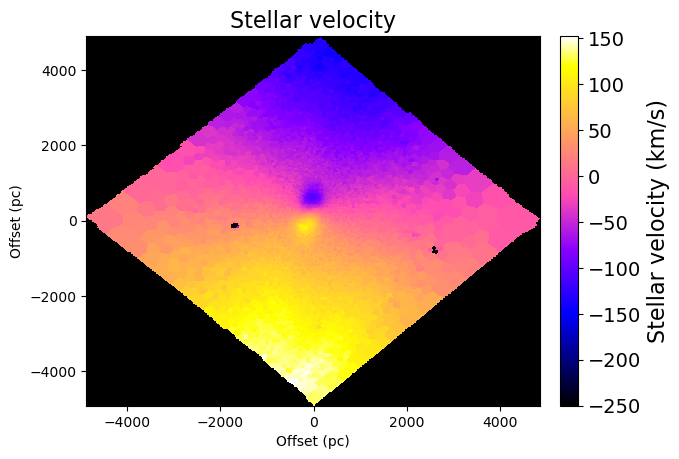

In [16]:
#Plot 2D image of results from ppxf fit

#Set the corners as a very low value for velocities
#So they don't turn up bright pink
for i in range(0,nx): 
    for j in range(0,ny): 
        HA_int = results_cube[5,j,i]
        if HA_int < 10**(-30):
            results_cube[0,j,i] = -400
            results_cube[2,j,i] = -400
            
            
image_2D = np.squeeze(results_cube[0,:,:]) #Stellar velocity

Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, cmap='gnuplot2',rasterized=True, shading='auto',vmin=-250)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Stellar velocity',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Stellar velocity (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

Text(0, 0.5, 'Offset (pc)')

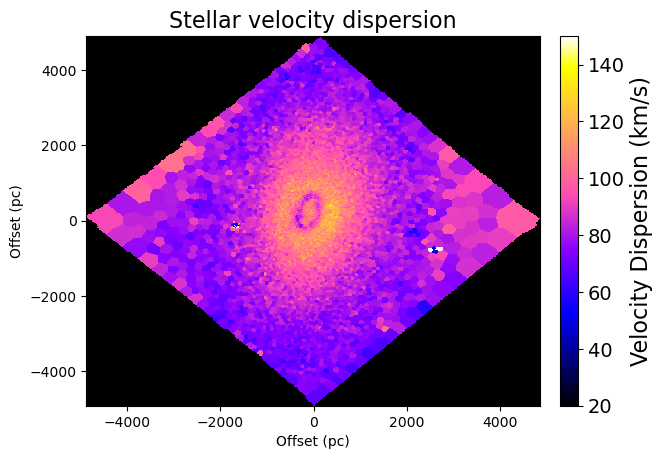

In [326]:
image_2D = np.squeeze(results_cube[1,:,:]) #Star vel disp
Z = image_2D

fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, cmap='gnuplot2',rasterized=True, shading='auto',vmax=150,vmin=20)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Stellar velocity dispersion',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Velocity Dispersion (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")


Text(0, 0.5, 'Offset (pc)')

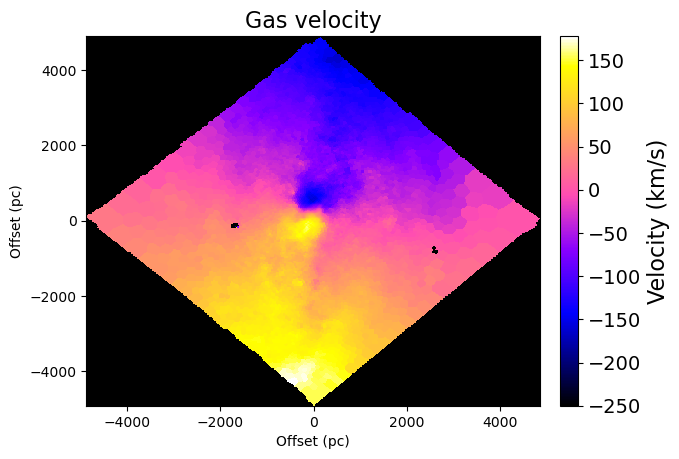

In [327]:
image_2D = np.squeeze(results_cube[2,:,:]) #Gas vel
Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, cmap='gnuplot2',rasterized=True, shading='auto',vmin=-250)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Gas velocity',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Velocity (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")


Text(0, 0.5, 'Offset (pc)')

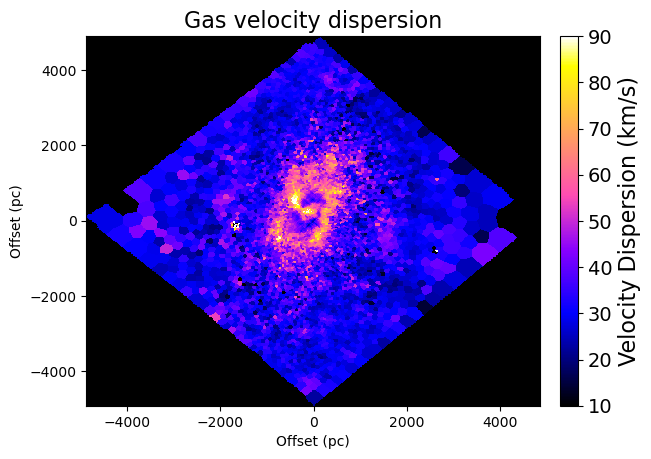

In [328]:
image_2D = np.squeeze(results_cube[3,:,:]) #Gas vel disp
Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, cmap='gnuplot2',rasterized=True, shading='auto',vmin=10,vmax=90)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Gas velocity dispersion',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Velocity Dispersion (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

#plt.xlim(-1000,1000)
#plt.ylim(-1000,1000)

#xline = np.arange(-100,20)
#yline = 70 -0.8*xline
#plt.plot(xline,yline,color="red")

#xline2 = np.arange(-300,70)
#yline2 = 390 + 1.9*xline2
#plt.plot(xline2,yline2,color="green")

Text(0, 0.5, 'Offset (pc)')

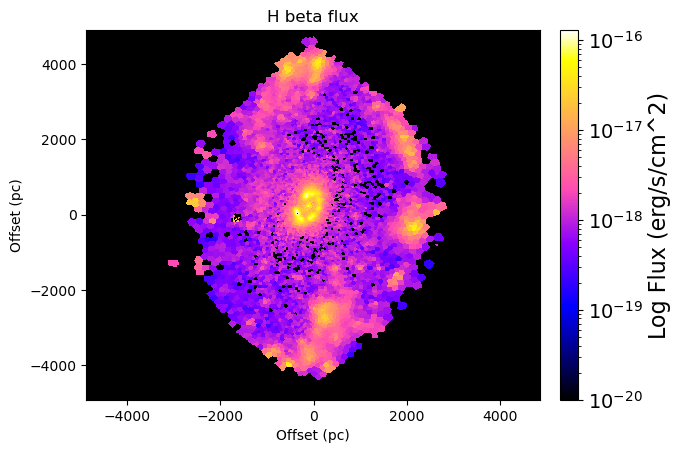

In [329]:
image_2D = 1.25* np.squeeze(results_cube[4,:,:]) #H beta flux

image_2D = bad_pix(image_2D,11,gas=True)

Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, norm=LogNorm(vmin=(10**-20)),cmap='gnuplot2',rasterized=True, shading='auto')
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('H beta flux')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/s/cm^2)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

'plt.xlim(-1000,1000)\nplt.ylim(-1000,1000)\n\nxline = np.arange(-310,40)\nyline = 70 - 0.8*xline\nplt.plot(xline,yline,color="red")\n\nxline2 = np.arange(-280,70)\nyline2 = 390 + (1.9*xline2)\nplt.plot(xline2,yline2,color="green")\n\nmajorlen = np.sqrt((np.max(xline2) - np.min(xline2))**2 + (np.max(yline2) - np.min(yline2))**2)\nprint("Length of the green line, in pc: ",majorlen)\nminorlen = np.sqrt((np.max(xline) - np.min(xline))**2 + (np.max(yline) - np.min(yline))**2)\nprint("Length of the red line, in pc: ",minorlen)'

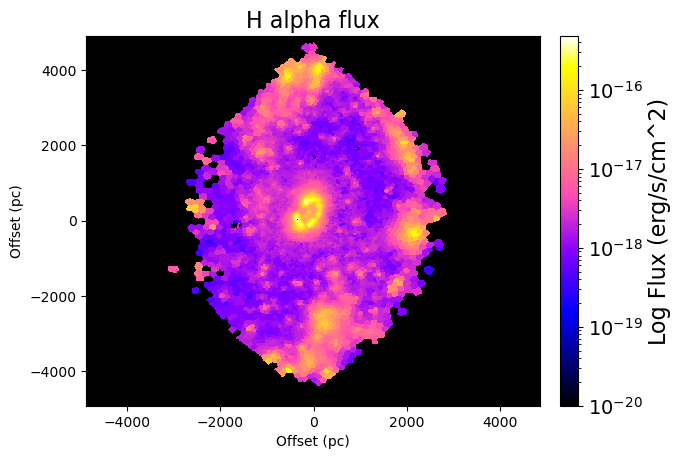

In [330]:
image_2D = np.squeeze(results_cube[5,:,:]) #H alpha flux
image_2D = 1.25*bad_pix(image_2D,12)

Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, norm=LogNorm(vmin=(10**-20)),cmap='gnuplot2',rasterized=True, shading='auto')
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('H alpha flux',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/s/cm^2)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

'''plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

xline = np.arange(-310,40)
yline = 70 - 0.8*xline
plt.plot(xline,yline,color="red")

xline2 = np.arange(-280,70)
yline2 = 390 + (1.9*xline2)
plt.plot(xline2,yline2,color="green")

majorlen = np.sqrt((np.max(xline2) - np.min(xline2))**2 + (np.max(yline2) - np.min(yline2))**2)
print("Length of the green line, in pc: ",majorlen)
minorlen = np.sqrt((np.max(xline) - np.min(xline))**2 + (np.max(yline) - np.min(yline))**2)
print("Length of the red line, in pc: ",minorlen)'''

Text(0, 0.5, 'Offset (pc)')

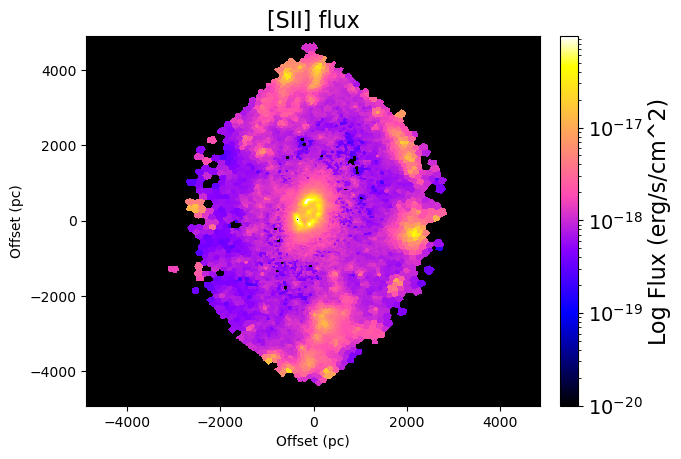

In [331]:
image_2D1 = np.squeeze(results_cube[6,:,:]) #SII 6716 flux
image_2D2 = np.squeeze(results_cube[7,:,:]) #SII 6731 flux
image_2D1 = 1.25*bad_pix(image_2D1,13)
image_2D2 = 1.25*bad_pix(image_2D2,14)

image_2D = image_2D1 + image_2D2


Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, norm=LogNorm(vmin=(10**-20)),cmap='gnuplot2',rasterized=True, shading='auto')
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('[SII] flux',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/s/cm^2)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

Text(0, 0.5, 'Offset (pc)')

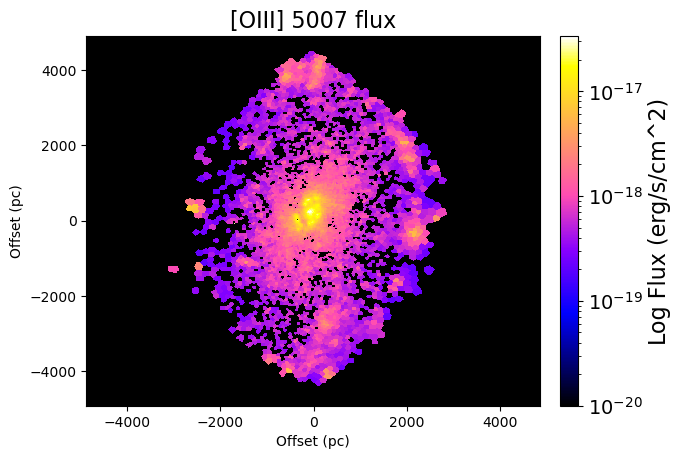

In [332]:
image_2D = np.squeeze(results_cube[8,:,:]) #OIII flux
image_2D = 1.25*bad_pix(image_2D,15)
Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, norm=LogNorm(vmin=(10**-20)),cmap='gnuplot2',rasterized=True, shading='auto')
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('[OIII] 5007 flux',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/s/cm^2)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

Text(0, 0.5, 'Offset (pc)')

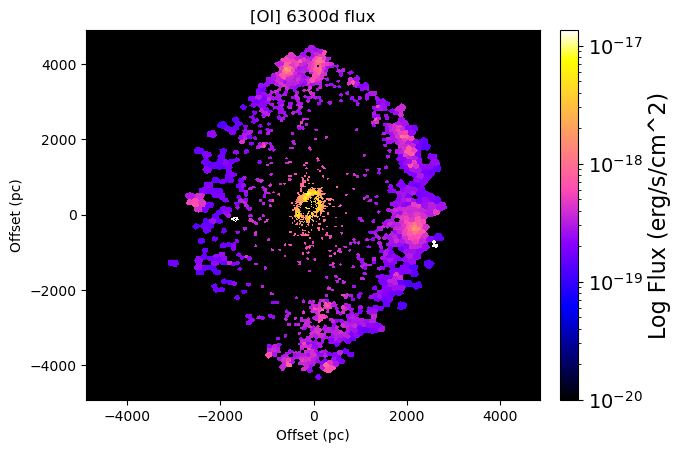

In [333]:
image_2D = np.squeeze(results_cube[9,:,:]) #[OI] 6300d flux
image_2D = 1.25*bad_pix(image_2D,16)
Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, norm=LogNorm(vmin=(10**-20)),cmap='gnuplot2',rasterized=True, shading='auto')
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('[OI] 6300d flux')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/s/cm^2)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

(446, 442) (446, 442) (446, 442)


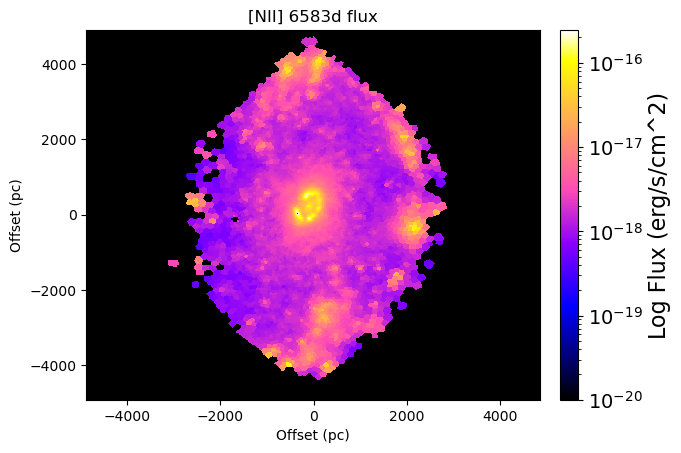

In [334]:
image_2D = np.squeeze(results_cube[10,:,:]) #[NII] 6583d flux
image_2D = 1.25*bad_pix(image_2D,17)
Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, norm=LogNorm(vmin=(10**-20)),cmap='gnuplot2',rasterized=True, shading='auto')
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('[NII] 6583d flux')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/s/cm^2)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

print(X.shape,Y.shape,Z.shape)

/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/1706290665.py:20: RuntimeWarning: divide by zero encountered in divide
  dust_2d = HA_2D/HB_2D


Text(0, 0.5, 'Offset (pc)')

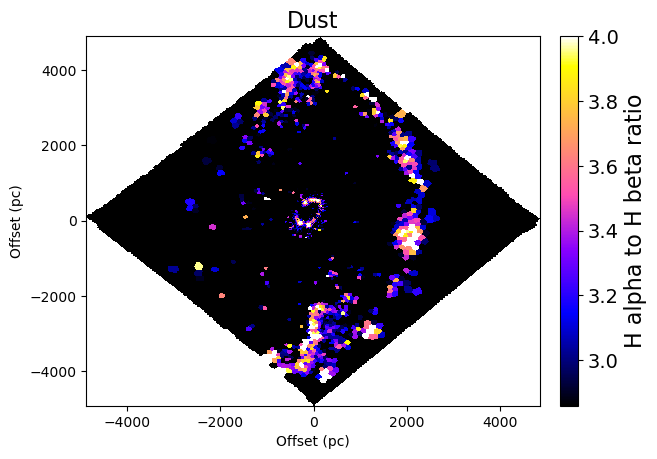

In [339]:
#Dust
HB_2D = np.squeeze(results_cube[4,:,:]) #H beta flux
#For dust, if it's a bad fit, put HB as high, so that dust will be low
for i in range(nx):
    for j in range(ny):
        flux = HB_2D[j,i]
        err = np.squeeze(results_cube[11,j,i])
        #Correct with chi^2 value
        #(chi^2 is actually chi^2/DOF)
        corr_err = err * np.sqrt(results_cube[21,j,i])
        if flux < 5*err:
            #If flux is lower than 3 * err, it's not a good enough fit
            HB_2D[j][i] = 1
        j+=1
    i+=1
HB_2D = 1.25*HB_2D
HA_2D = np.squeeze(results_cube[5,:,:]) #H alpha flux
HA_2D = 1.25*bad_pix(HA_2D,12)
HA_2D = HA_2D
dust_2d = HA_2D/HB_2D

''''#Run it again to cut out anywhere HA/HB > 2.86
for i in range(nx):
    for j in range(ny):
        flux = dust_2d[j,i]
        if flux < 2.86:
            #If the ratio < 2.86, something's wrong with the fit
            dust_2d[j][i] = 10
        j+=1'''



Z = dust_2d

fig = plt.figure()  #norm=LogNorm(vmin=(10**(-20)))
im = plt.pcolormesh(X,Y,Z,cmap='gnuplot2',rasterized=True, shading='auto',vmax=4,vmin=2.86)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Dust',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('H alpha to H beta ratio', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

In [290]:
#Now for some BPTS

In [340]:
def singlebad_pix(x,y,results_ind,results_err_ind,gas=True):
    
    bad_pix=False
    flux = results_cube[results_ind,y,x]
    
    err = np.squeeze(results_cube[results_err_ind,y,x])
    #Correct with chi^2 value
    #(chi^2 is actually chi^2/DOF)
    if gas==True: 
        chi2 = results_cube[22,y,x]
        corr_err = err * np.sqrt(chi2)
    else: 
        results_cube[21,y,x]
        corr_err = err * np.sqrt(chi2)
    
    if (flux < 5*corr_err) or (chi2>1.5) or (chi2<0.05):
        #If flux is lower than 3 * err, it's not a good enough fit
        bad_pix=True
    return(bad_pix)

In [341]:
#Define BPT lines as function
def NII_Ka03(x):
    y = (0.61/(x-0.05)) + 1.3
    return y

In [342]:
def NII_Ke01(x):
    y = (0.61/(x-0.47)) + 1.19
    return y

/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/391104364.py:14: RuntimeWarning: divide by zero encountered in log
  NII_HA_ratio = np.log(NII_int/HA_int)
/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/391104364.py:20: RuntimeWarning: invalid value encountered in double_scalars
  OIII_HB_ratio = np.log(OIII_int/HB_int)
/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/391104364.py:20: RuntimeWarning: divide by zero encountered in log
  OIII_HB_ratio = np.log(OIII_int/HB_int)


Text(0.5, 1.0, 'NII BPT results')

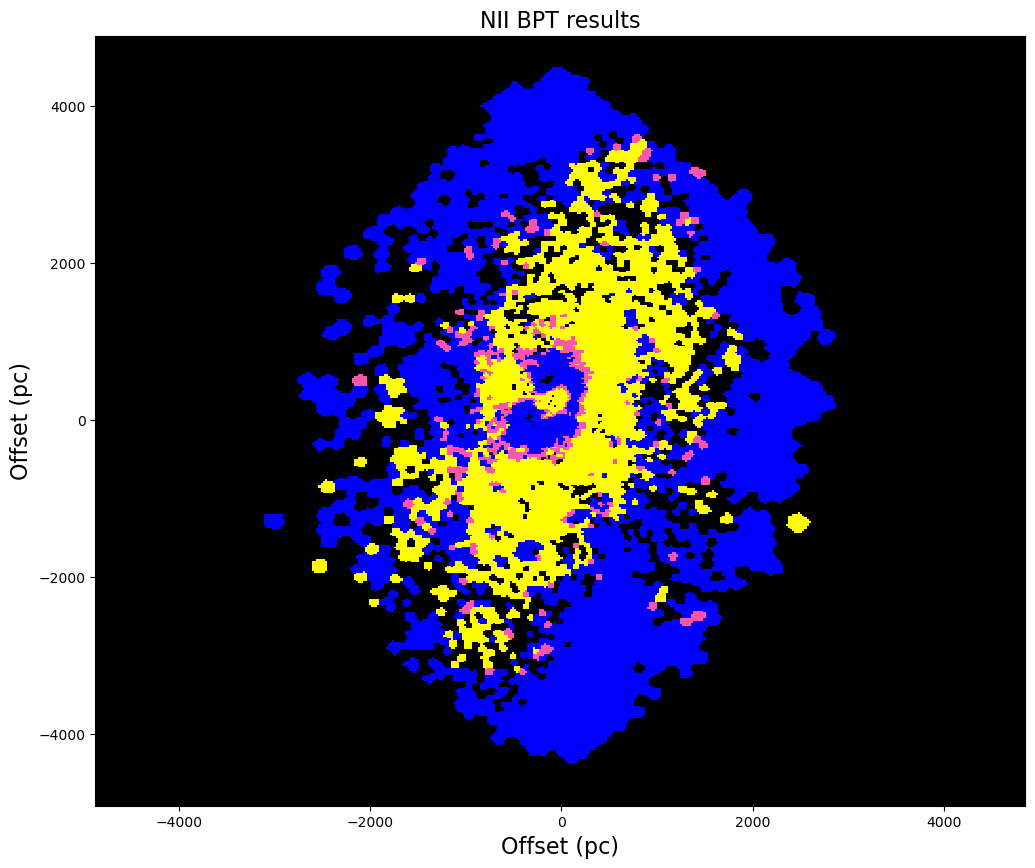

In [343]:
#2D image color-coded by BPT results
output_number = 1
#results_cube = np.empty(shape=(18,ny,nx))
BPT_res = np.empty(shape=(nx,ny))
x_array = np.empty(shape=(nx,ny))
y_array = np.empty(shape=(nx,ny))
for i in range(0,nx): #x #non-inclusive of last value
    for j in range(0,ny): #y #non-inclusive of last value
        
        NII_int = 6549*results_cube[10,j,i]
        badNII = singlebad_pix(i,j,10,17)
        HA_int = 6565*results_cube[5,j,i]
        badHA = singlebad_pix(i,j,5,12)
        NII_HA_ratio = np.log(NII_int/HA_int)

        OIII_int = 5007*results_cube[8,j,i]
        badOIII = singlebad_pix(i,j,8,15)
        HB_int = 4862*results_cube[4,j,i]
        badHB = singlebad_pix(i,j,4,11)
        OIII_HB_ratio = np.log(OIII_int/HB_int)
        
        #if bad_fit(i,j)==False:
        x = (i-xcen) * 22
        y = (j-ycen) * 22
        x_array[i,j] = x
        y_array[i,j] = y
        
        
        if HA_int<10**(-25):
            BPT_res[i][j] = 0
            
        elif (badNII==True) or (badHA==True) or (badOIII==True) or (badHB==True):
            BPT_res[i][j] = 0
        
        else: 
            if OIII_HB_ratio > NII_Ke01(NII_HA_ratio) or NII_HA_ratio>0:
                #AGN
                #if bad_fit(i,j)==False:
                BPT_res[i][j] = 11  
            elif (OIII_HB_ratio < NII_Ke01(NII_HA_ratio)) & (OIII_HB_ratio > NII_Ka03(NII_HA_ratio)):
                #Composite
                #if bad_fit(i,j)==False:
                BPT_res[i][j] = 7
            else: #OIII_HB_ratio < Ka03(NII_HA_ratio)
                #HII
                #if bad_fit(i,j)==False:
                BPT_res[i][j] = 3
                
plt.style.use('default')
fig = plt.figure(figsize=(12,10))
Z = BPT_res
#plt.scatter(x_array,y_array,c=BPT_res,cmap="plasma")
im = plt.pcolormesh(x_array,y_array,BPT_res,cmap='gnuplot2',rasterized=True, shading='auto',vmax=12,vmin=0)

#cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
#cbar.set_label('Classification by BPT', fontsize=16)
#cbar.ax.tick_params(labelsize=16)
plt.xlabel("Offset (pc)",fontsize=16)
plt.ylabel("Offset (pc)",fontsize=16)
plt.title("NII BPT results",fontsize=16)



Line length:  3475.343148525049


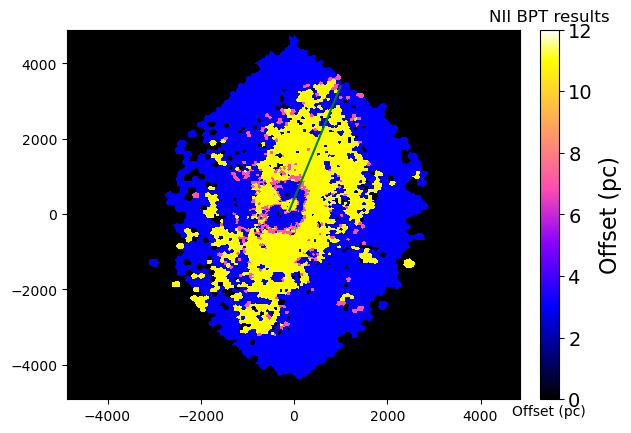

In [295]:
im = plt.pcolormesh(x_array,y_array,BPT_res,cmap='gnuplot2',rasterized=True, shading='auto',vmax=12,vmin=0)

xline = np.arange(-100,1000)
yline = 400+3*xline
plt.plot(xline,yline,color="green")

cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Classification by BPT', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")
plt.title("NII BPT results")

line_len = np.sqrt((np.max(xline)-np.min(xline))**2 + (np.max(yline) - np.min(yline))**2)
print("Line length: ", line_len)


In [296]:
#Define BPT lines for SII
def SII_Ke01(x):
    if x<0.2:
        y = (0.72/(x-0.32)) + 1.3
    elif x>0.2:
        y = -5
    return y

In [297]:
def SII_SL(x):
    #Above this line and Ke01, Seyfert. Below this but above Ke01, LINER
    y = 1.89*x + 0.76
    return y

Text(0.5, 1.0, 'SII BPT results')

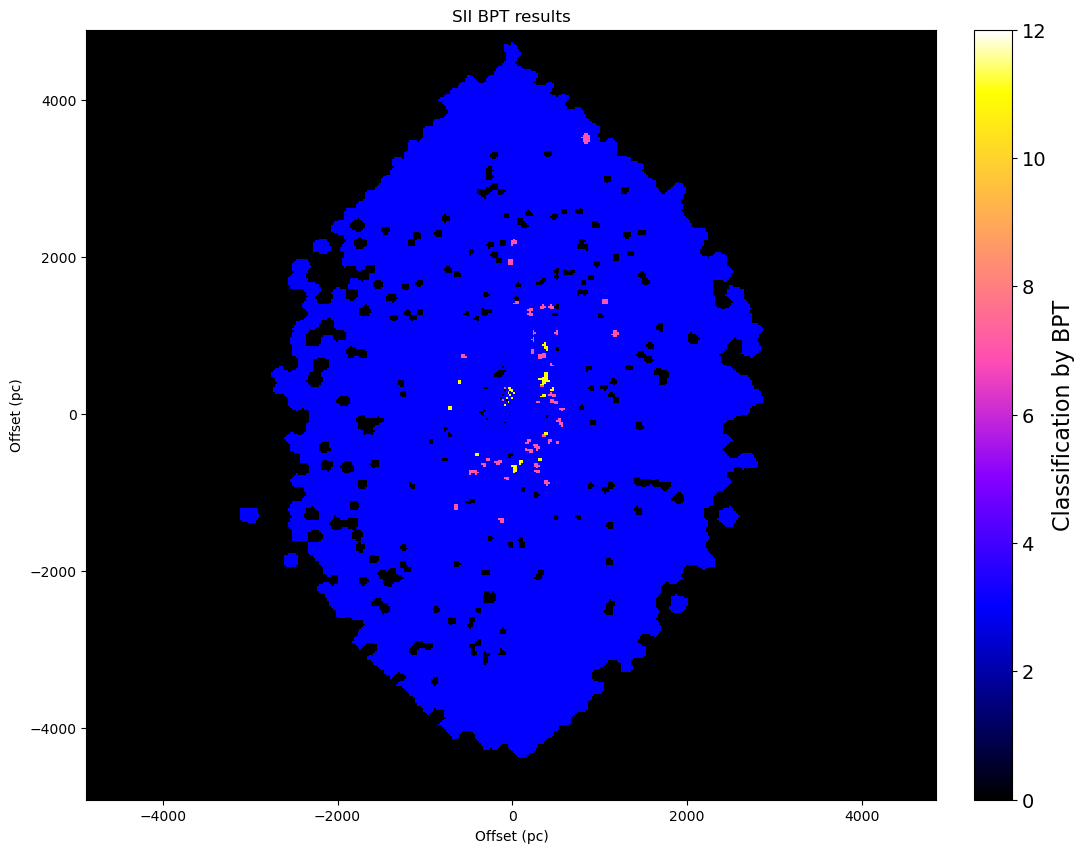

In [298]:
BPT_res = np.empty(shape=(nx,ny))
x_array = np.empty(shape=(nx,ny))
y_array = np.empty(shape=(nx,ny))
#Excluding x=166 and x=175 for now, to avoid pix with bad fit
for i in range(0,nx): #non-inclusive of last value
    for j in range(0,ny): #non-inclusive of last value
        
        SII_int_1 = results_cube[6,j,i]
        SII_int_2 = results_cube[7,j,i]
        SII_int_tot = SII_int_1 + SII_int_2
        HA_int = results_cube[5,j,i]
        SII_HA_ratio = np.log(SII_int_tot/HA_int)

    
        OIII_int = results_cube[8,j,i]
        HB_int = results_cube[4,j,i]
        OIII_HB_ratio = np.log(OIII_int/HB_int)
        
        badSII_1 = singlebad_pix(i,j,6,13)
        badSII_2 = singlebad_pix(i,j,7,14)
        badHA = singlebad_pix(i,j,5,12)
        badOIII = singlebad_pix(i,j,8,15)
        badHB = singlebad_pix(i,j,4,11)
        
        x = (i-xcen) * 22
        y = (j-ycen) * 22
        x_array[i,j] = x
        y_array[i,j] = y
        
        
        if HA_int < 10**(-30):
            BPT_res[i][j] = 0
            
        elif (badSII_1==True) or (badSII_2==True) or (badHA==True) or (badOIII==True) or (badHB==True):
            BPT_res[i][j] = 0
        else:   
            if (OIII_HB_ratio < SII_Ke01(SII_HA_ratio)):
                #HII
                #if bad_fit(i,j)==False:
                BPT_res[i][j] = 3
            else:
                if (OIII_HB_ratio > SII_SL(SII_HA_ratio)):
                    #Seyfert
                    #if bad_fit(i,j)==False:
                    BPT_res[i][j] = 11
                else:
                    #LINER
                    #if bad_fit(i,j)==False:
                    BPT_res[i][j] = 7
            
        

plt.style.use('default')
fig = plt.figure(figsize=(12,10))
Z = BPT_res
#plt.scatter(x_array,y_array,c=BPT_res,cmap="plasma")
im = plt.pcolormesh(x_array,y_array,BPT_res,cmap='gnuplot2',rasterized=True, shading='auto',vmax=12,vmin=0)

cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Classification by BPT', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")
plt.title("SII BPT results")

/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/1295432273.py:13: RuntimeWarning: divide by zero encountered in log
  NII_HA_ratio = np.log(NII_int/HA_int)
/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/1295432273.py:17: RuntimeWarning: invalid value encountered in double_scalars
  OIII_HB_ratio = np.log(OIII_int/HB_int)
/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/1295432273.py:17: RuntimeWarning: divide by zero encountered in log
  OIII_HB_ratio = np.log(OIII_int/HB_int)


Text(-1.5, 0, 'HII')

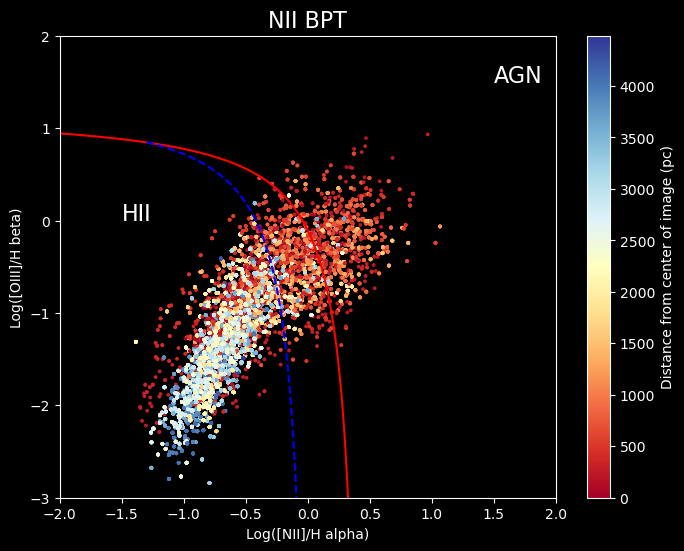

In [344]:
#NII BPT with distance on colorbar
NII_Halpha = np.array([])
OIII_Hbeta = np.array([])
dist_array = np.array([])
output_number = 1

for i in range(0,nx): #non-inclusive of last value
    j=0
    for j in range(0,ny): #non-inclusive of last value
        
        NII_int = results_cube[10,j,i]
        HA_int = results_cube[5,j,i]
        NII_HA_ratio = np.log(NII_int/HA_int)
    
        OIII_int = results_cube[8,j,i]
        HB_int = results_cube[4,j,i]
        OIII_HB_ratio = np.log(OIII_int/HB_int)
        
        
        x_dist = (i-xcen)**2
        y_dist = (j-ycen)**2
        dist_pix = np.sqrt(x_dist+y_dist)
        dist = dist_pix * 22 #convert pix to arcsec
        
        
        badNII = singlebad_pix(i,j,10,17)
        badHA = singlebad_pix(i,j,5,12)
        badOIII = singlebad_pix(i,j,8,15)
        badHB = singlebad_pix(i,j,4,11)
        
        if (badNII==False) & (badHA==False) & (badOIII==False) & (badHB==False):
            #add values from this pixel to arrays
            NII_Halpha = np.append(NII_Halpha,NII_HA_ratio)
            OIII_Hbeta = np.append(OIII_Hbeta,OIII_HB_ratio)
            dist_array = np.append(dist_array,dist)
        
        j = j+1
    i = i+1


plt.style.use('dark_background')  
fig = plt.figure(figsize=(8,6))
plt.scatter(NII_Halpha,OIII_Hbeta,c=dist_array, s=3, antialiased=True, cmap=plt.cm.RdYlBu, marker="o")

#Draw BPT lines
Ka03x = np.arange(-1.3,0,0.01) #The lines intersect at -1.3
Ka03y=(0.61/(Ka03x-0.05)) + 1.3

Ke01x = np.arange(-3,0.4,0.01)
Ke01y = (0.61/(Ke01x-0.47)) + 1.19


plt.plot(Ke01x,Ke01y, label="Ke01", color="red")
plt.plot(Ka03x,Ka03y, label="Ka03", linestyle="--", color='blue')
    
plt.xlim(-2,2)
plt.ylim(-3,2)
    
plt.xlabel("Log([NII]/H alpha)")
plt.ylabel("Log([OIII]/H beta)")
plt.title("NII BPT",fontsize=16) 
#plt.legend()
plt.colorbar(label="Distance from center of image (pc)")

plt.text(1.5,1.5,'AGN',fontsize=16)
plt.text(-1.5,0,'HII',fontsize=16)


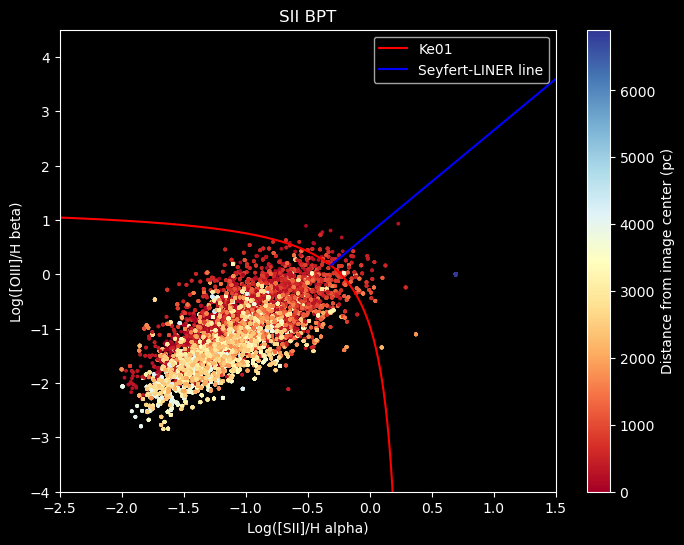

In [300]:
#SII BPT with distance on colorbar
SII_Halpha = np.array([])
OIII_Hbeta = np.array([])
dist_array = np.array([])
for i in range(0,nx): #non-inclusive of last value
    for j in range(0,ny): #non-inclusive of last value
        
        SII_int_1 = results_cube[6,j,i]
        SII_int_2 = results_cube[7,j,i]
        SII_int_tot = SII_int_1 + SII_int_2
        HA_int = results_cube[5,j,i]
        SII_HA_ratio = np.log(SII_int_tot/HA_int)

    
        OIII_int = results_cube[8,j,i]
        HB_int = results_cube[4,j,i]
        OIII_HB_ratio = np.log(OIII_int/HB_int)
        
        x_dist = (i-xcen)**2
        y_dist = (j-ycen)**2
        dist_pix = np.sqrt(x_dist+y_dist)
        dist = dist_pix * 22 #convert pix to arcsec
        
        SII_Halpha = np.append(SII_Halpha,SII_HA_ratio)
        OIII_Hbeta = np.append(OIII_Hbeta,OIII_HB_ratio)
        dist_array = np.append(dist_array,dist)
        
        j+=1
    i+=1
        
fig = plt.figure(figsize=(8,6))
plt.style.use('dark_background')
plt.scatter(SII_Halpha,OIII_Hbeta,c=dist_array,s=3,antialiased=True, cmap=plt.cm.RdYlBu, marker="o")

#Plot BPT lines
#Below Ke01, HII. Above, AGN
Ke01x = np.arange(-3,0.2,0.01)
Ke01y = (0.72/(Ke01x-0.32)) + 1.3
    
#Above this line and Ke01, Seyfert. Below this but above Ke01, LINER
SLx = np.arange(-0.31,2,0.01)
SLy = 1.89*SLx + 0.76

plt.plot(Ke01x,Ke01y, label="Ke01", color="red")
plt.plot(SLx,SLy, label="Seyfert-LINER line", color="blue")
    
plt.legend()
plt.ylim(-4,4.5)
plt.xlim(-2.5,1.5)
plt.xlabel("Log([SII]/H alpha)")
plt.ylabel("Log([OIII]/H beta)")
plt.title("SII BPT")

plt.colorbar(label="Distance from image center (pc)")    

In [301]:
#Lines for OI BPT
def OI_Ke01(x):
    if x<=-0.65:
        y = (0.73/(x+0.59)) + 1.33
    else:
        y=-5
    return y

In [302]:
def OI_SL(x):
    y = 1.18*x + 1.3
    return y

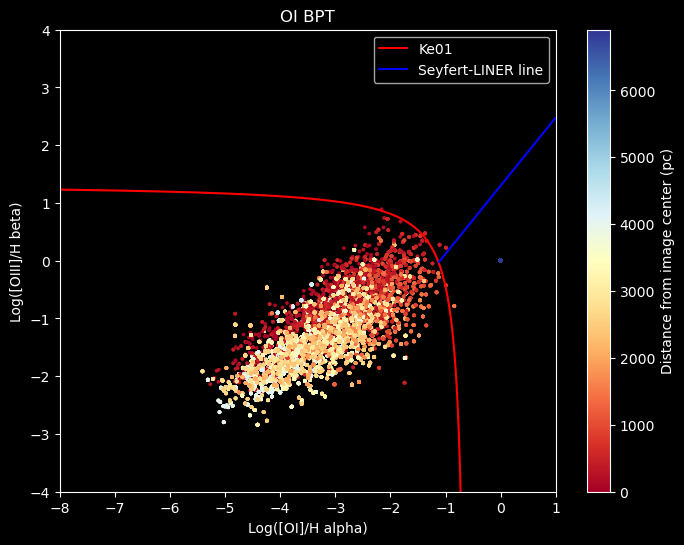

In [303]:
#OI BPT with distance on colorbar
OI_Halpha = np.array([])
OIII_Hbeta = np.array([])
dist_array = np.array([])

for i in range(0,nx): #non-inclusive of last value
    j=0
    for j in range(0,ny): #non-inclusive of last value
        #Line intensity ratios: 
        OI_int = results_cube[9,j,i]
        HA_int = results_cube[5,j,i]
        OI_HA_ratio = np.log(OI_int/HA_int)
    
        OIII_int = results_cube[8,j,i]
        HB_int = results_cube[4,j,i]
        OIII_HB_ratio = np.log(OIII_int/HB_int)
        
        x_dist = (i-xcen)**2
        y_dist = (j-ycen)**2
        dist_pix = np.sqrt(x_dist+y_dist)
        dist = dist_pix * 22 #convert pix to arcsec
        
        OI_Halpha = np.append(OI_Halpha,OI_HA_ratio)
        OIII_Hbeta = np.append(OIII_Hbeta,OIII_HB_ratio)
        dist_array = np.append(dist_array,dist)
            
plt.style.use('dark_background')        
fig = plt.figure(figsize=(8,6))
plt.scatter(OI_Halpha,OIII_Hbeta,c=dist_array,s=3,antialiased=True, cmap=plt.cm.RdYlBu, marker="o")

Ke01x = np.arange(-10,-0.65,0.01) #Min should be -2
Ke01y = (0.73/(Ke01x+0.59)) + 1.33
    
SLx = np.arange(-1.12,1,0.01)
SLy = 1.18*SLx + 1.3

plt.plot(Ke01x,Ke01y, label="Ke01", color="red")
plt.plot(SLx,SLy, label="Seyfert-LINER line", color='blue')
    
plt.legend()
plt.ylim(-4,4)
plt.xlim(-8,1) 
plt.xlabel("Log([OI]/H alpha)")
plt.ylabel("Log([OIII]/H beta)")
plt.title("OI BPT")

plt.colorbar(label="Distance from image center (pc)")     

Text(0.5, 1.0, 'OI BPT results')

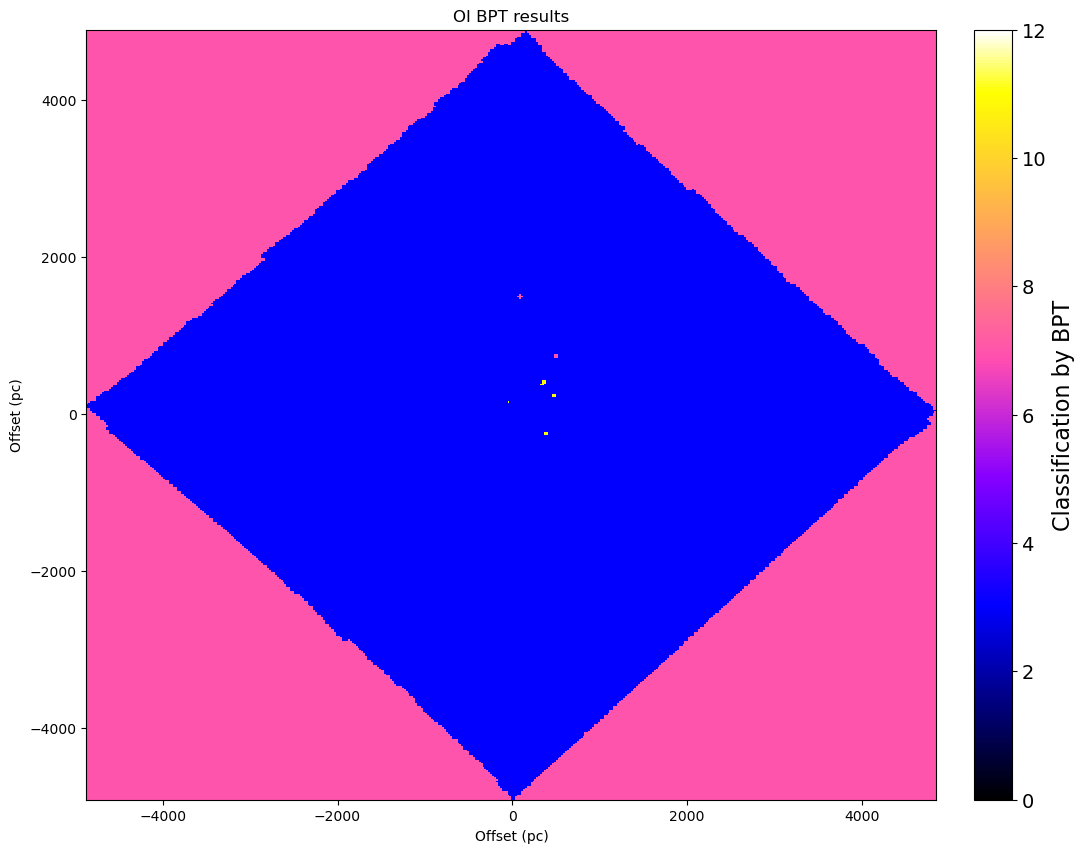

In [304]:
OI_Halpha = np.empty(shape=(nx,ny))
x_array = np.empty(shape=(nx,ny))
y_array = np.empty(shape=(nx,ny))

for i in range(0,nx): #non-inclusive of last value
    j=0
    for j in range(0,ny): #non-inclusive of last value
        #Line intensity ratios: 
        OI_int = results_cube[9,j,i]
        HA_int = results_cube[5,j,i]
        OI_HA_ratio = np.log(OI_int/HA_int)
    
        OIII_int = results_cube[8,j,i]
        HB_int = results_cube[4,j,i]
        OIII_HB_ratio = np.log(OIII_int/HB_int)
        
        x = (i-xcen) * 22
        y = (j-ycen) * 22
        x_array[i][j] = x
        y_array[i][j] = y
        
        if HA_int < 10**(-30):
            BPT_res[i][j] = 0
        else: 
        
            if ((OIII_HB_ratio > OI_Ke01(OI_HA_ratio)) & (OIII_HB_ratio > OI_SL(OI_HA_ratio))):
                #Seyfert
                #if bad_fit(i,j)==False:
                BPT_res[i][j] = 11
            elif ((OIII_HB_ratio > OI_Ke01(OI_HA_ratio)) & (OIII_HB_ratio < OI_SL(OI_HA_ratio))):
                #LINER
                #if bad_fit(i,j)==False:
                BPT_res[i][j] = 7
            else:
                #HII
                #if bad_fit(i,j)==False:
                BPT_res[i][j] = 3
    
plt.style.use('default')
fig = plt.figure(figsize=(12,10))
Z = BPT_res
#plt.scatter(x_array,y_array,c=BPT_res,cmap="plasma")
im = plt.pcolormesh(x_array,y_array,BPT_res,cmap='gnuplot2',rasterized=True, shading='auto',vmax=12,vmin=0)

cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Classification by BPT', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")
plt.title("OI BPT results")      
                

(446, 442) (446, 442) (446, 442)


/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/2562757891.py:4: RuntimeWarning: divide by zero encountered in divide
  HA_ratio = HA/HA_err


Text(0, 0.5, 'Offset (pc)')

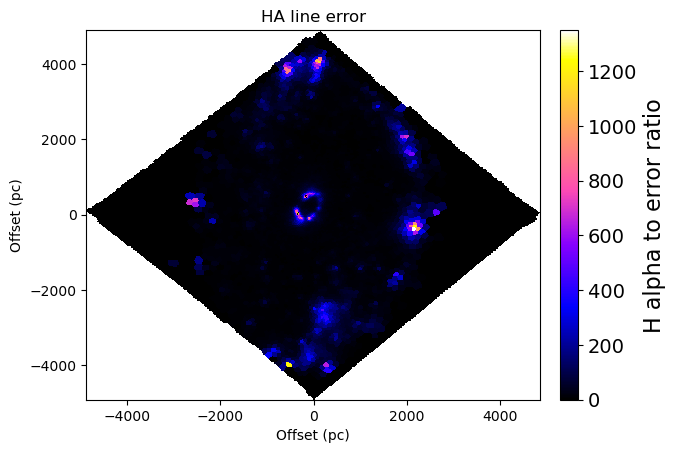

In [305]:
#Checking on the line flux err
HA = np.squeeze(results_cube[5,:,:])
HA_err = np.squeeze(results_cube[12,:,:])
HA_ratio = HA/HA_err

Z = np.squeeze(HA_ratio)

print(X.shape,Y.shape,Z.shape)

fig = plt.figure()  #norm=LogNorm(vmin=(10**(-20)))
im = plt.pcolormesh(X,Y,Z,cmap='gnuplot2',shading="nearest",rasterized=True)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('HA line error')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('H alpha to error ratio', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

(446, 442) (446, 442) (446, 442)


/var/folders/dw/g3c4psxd7fj5l_jnqd47fny40000gn/T/ipykernel_73396/705957255.py:4: RuntimeWarning: divide by zero encountered in divide
  HB_ratio = HB/HB_err


Text(0, 0.5, 'Offset (pc)')

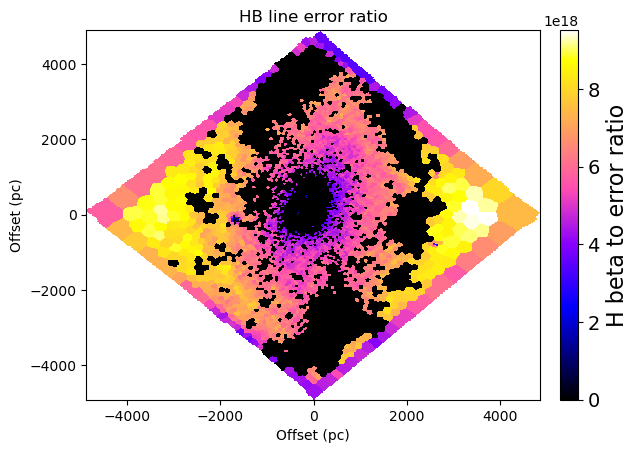

In [306]:
#Checking on the line flux err
HB = np.squeeze(results_cube[4,:,:])
HB_err = np.squeeze(results_cube[11,:,:])
HB_ratio = HB/HB_err

Z = np.squeeze(HB_ratio)

print(X.shape,Y.shape,Z.shape)

fig = plt.figure()  #norm=LogNorm(vmin=(10**(-20)))
im = plt.pcolormesh(X,Y,Z,cmap='gnuplot2',shading="nearest",rasterized=True)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('HB line error ratio')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('H beta to error ratio', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

(446, 442) (446, 442) (446, 442)


Text(0, 0.5, 'Offset (pc)')

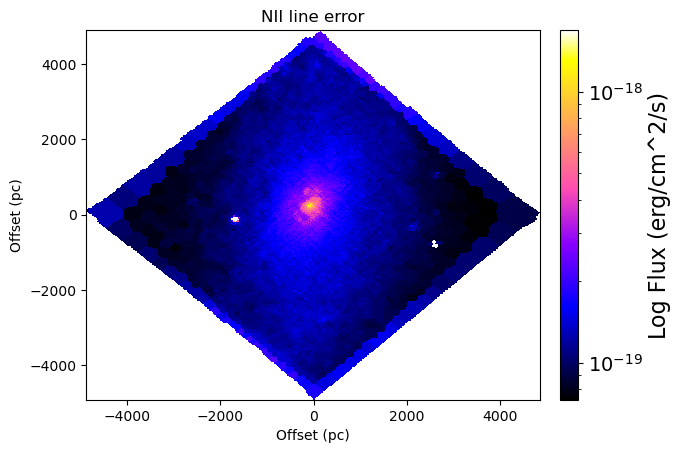

In [307]:
#Checking on the line flux err
#HB = np.squeeze(results_cube[4,:,:])
HB_err = np.squeeze(results_cube[16,:,:])
#HB_ratio = HB/HB_err

Z = HB_err

print(X.shape,Y.shape,Z.shape)

fig = plt.figure()  #norm=LogNorm(vmin=(10**(-20)))
im = plt.pcolormesh(X,Y,Z,norm=LogNorm(),cmap='gnuplot2',shading="nearest",rasterized=True)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('NII line error')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/cm^2/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

In [308]:
SII_err = results_cube[13,:,:]
print(np.mean(SII_err))

NII_err = results_cube[16,:,:]
print(np.mean(NII_err))

4.686673821244159e-20
nan


Text(0, 0.5, 'Offset (pc)')

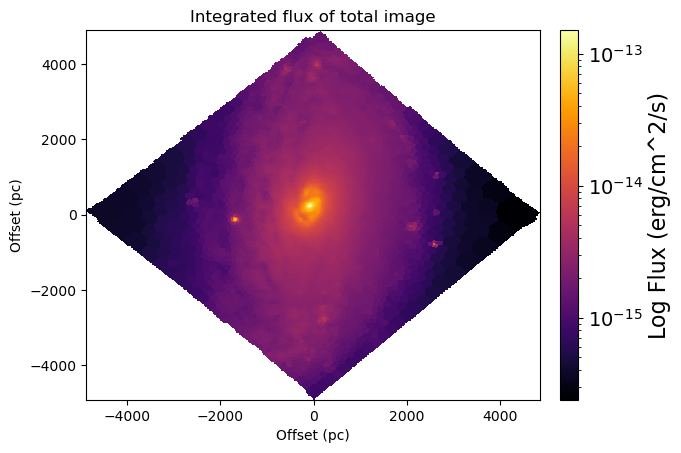

In [309]:
image_2D = np.squeeze(np.nansum(data_cube,axis=0))

Z = image_2D


fig = plt.figure()  #norm=LogNorm(vmin=(10**(-20)))
im = plt.pcolormesh(X,Y,Z,norm=LogNorm(),cmap='inferno',shading="nearest",rasterized=True)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Integrated flux of total image')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('Log Flux (erg/cm^2/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

(446, 442) (446, 442) (446, 442)
0.0 5.539299008941366
0.05106031490786899


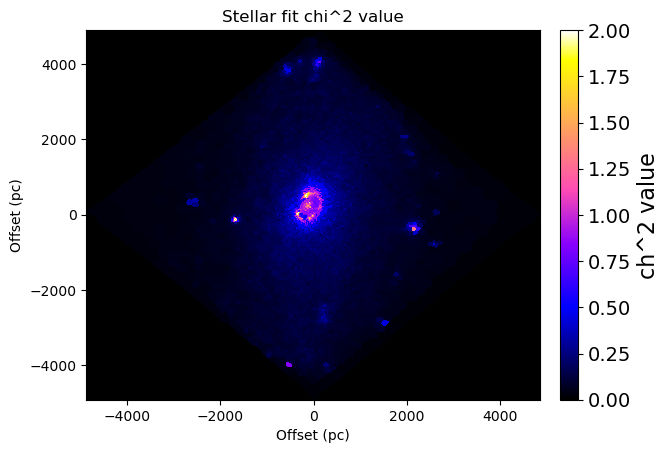

In [318]:
#Checking the chi^2 value, to see if the error is a good estimate
#And where the fits are good or bad.
im_2D = np.squeeze(results_cube[22,:,:]) #Star chi2

Z = im_2D

print(X.shape,Y.shape,Z.shape)

fig = plt.figure()  #norm=LogNorm(vmin=(10**(-20)))
im = plt.pcolormesh(X,Y,Z,cmap='gnuplot2',shading="nearest",rasterized=True,vmax=2)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Stellar fit chi^2 value')
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
#Need to check on what units PPXF outputs
cbar.set_label('chi^2 value', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")
print(np.min(im_2D),np.max(im_2D))
print(np.mean(im_2D))